In [1]:
# 사용할 데이터셋 다운로드 하기

import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL  = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url= HOUSING_URL, housing_path= HOUSING_PATH):
  os.makedirs(housing_path, exist_ok= True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path= housing_path)
  housing_tgz.close()
  
fetch_housing_data()


In [2]:
# 다운받은 csv 를 pandas 데이터 프레임으로 불러오기
# 분석을 할 때는 class화 또는 작업 마다의 함수화를 시켜주는 것이 좋다.

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


데이터를 받고 제일 처음 해야 하는 작업은 무엇일까요?
- 데이터의 의미 파악
    - 어떤것이 feature이고, 어떤 것이 target인가?
    - target은 항상 한개가 아닙니다.


- 데이터의 특징 파악
    - 상관 관계
    - 데이터 타입 확인
    - 등등등...

데이터 프레임의 정보를 확인해야 한다.
- 데이터의 전반적인 개요를 확인을 할 수 있다.
- 개요를 토대로 분석을 어떻게 할 지 계획을 세울 수도 있다.

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

머신러닝을 할 데이터는 표준편차가 작은 것이 좋다.
데이터 스케일링이 필요함 (특성공학)

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


숫자로 보면 힘드니가 시각화를 통해서 봅시다.

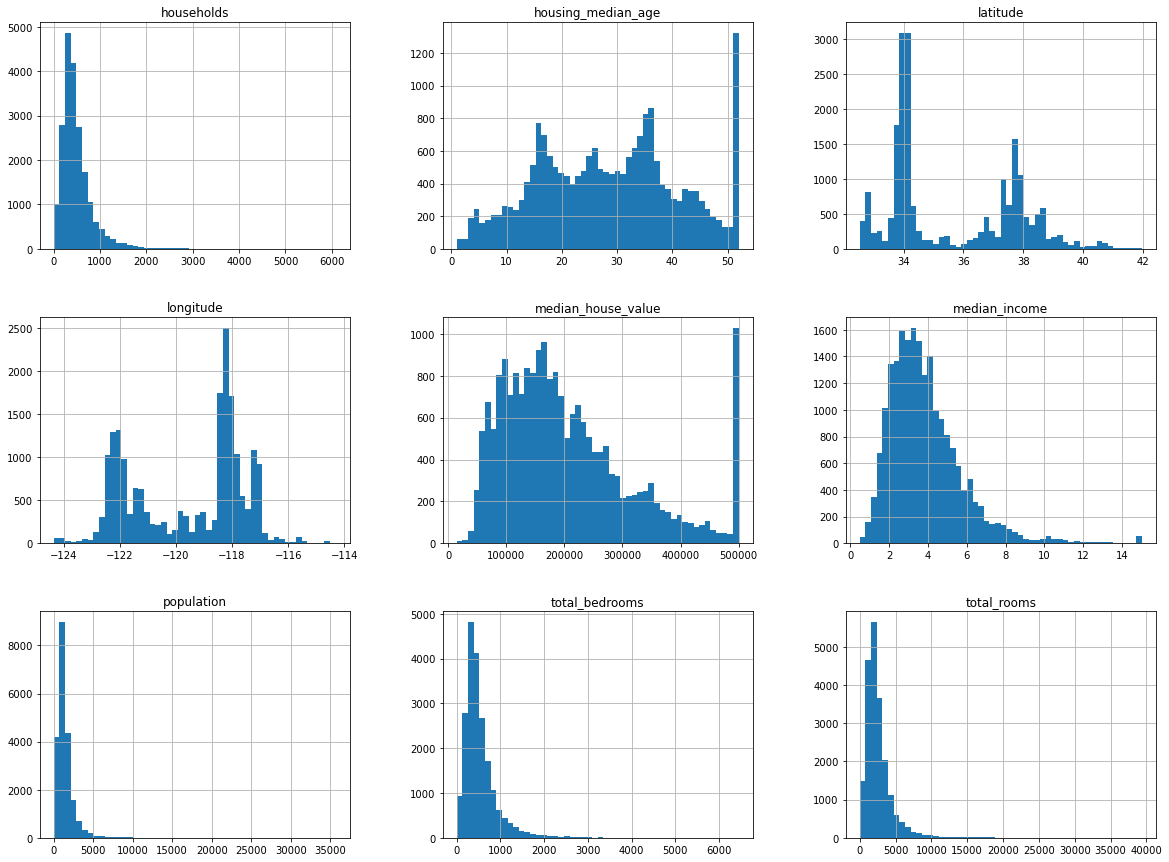

In [7]:
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
# 히스토그램을 본다라는 이야기는 구간별 빈도수를 본다는 이야기이다.
# ->데이터가 어디에 많이 몰려있는지를 볼 수 있다.
plt.show()

테스트 세트를 만들기 위한 분석
- 테스트 세트를 만드는 이유
1. 일반화 오차를 없애기위해
    - 가지고 있는 모든 데이터로 훈련을 하는 바람에 실제 데이터에서 오차가 일어나는 현상
- 학습이 잘 됬다는 것을 증명하기 위해 테스트가 필요함
2. 신뢰성 있는 모델 생성

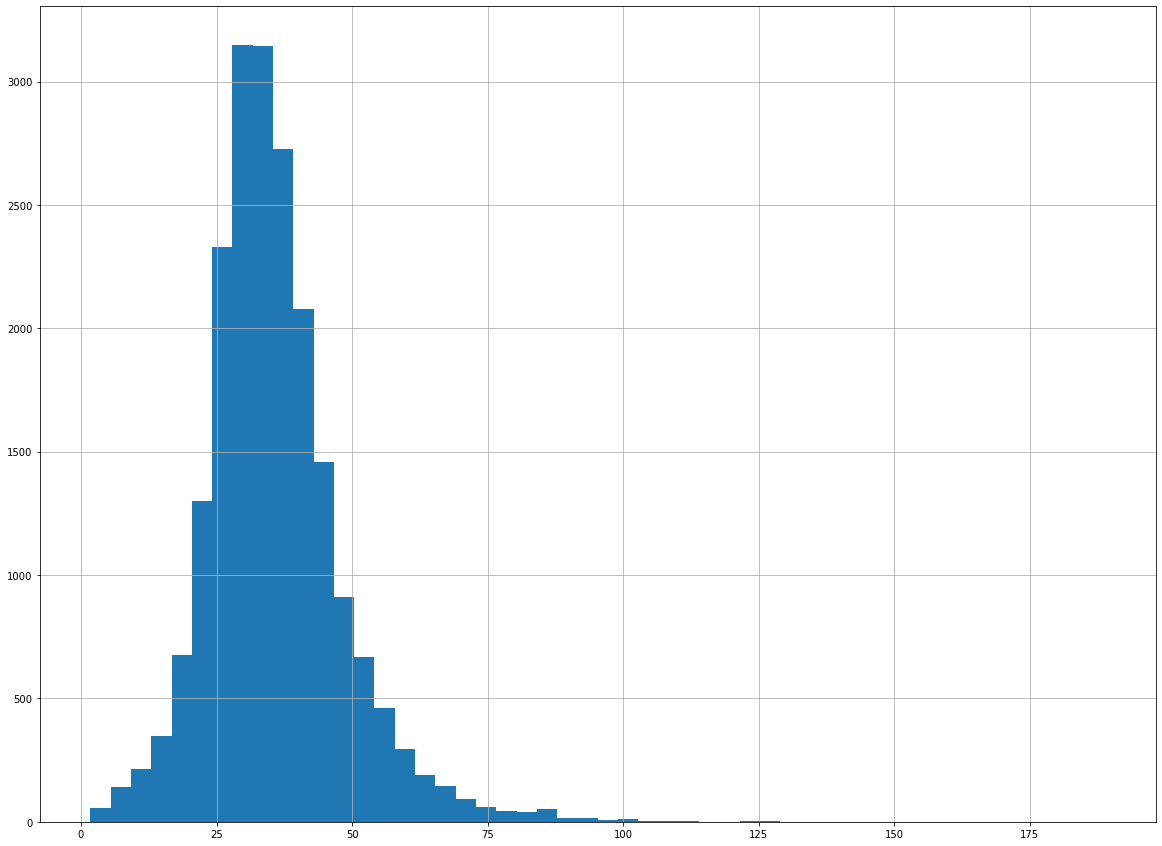

In [8]:
import numpy as np

np.sqrt(housing['population']).hist(bins=50, figsize=(20,15))

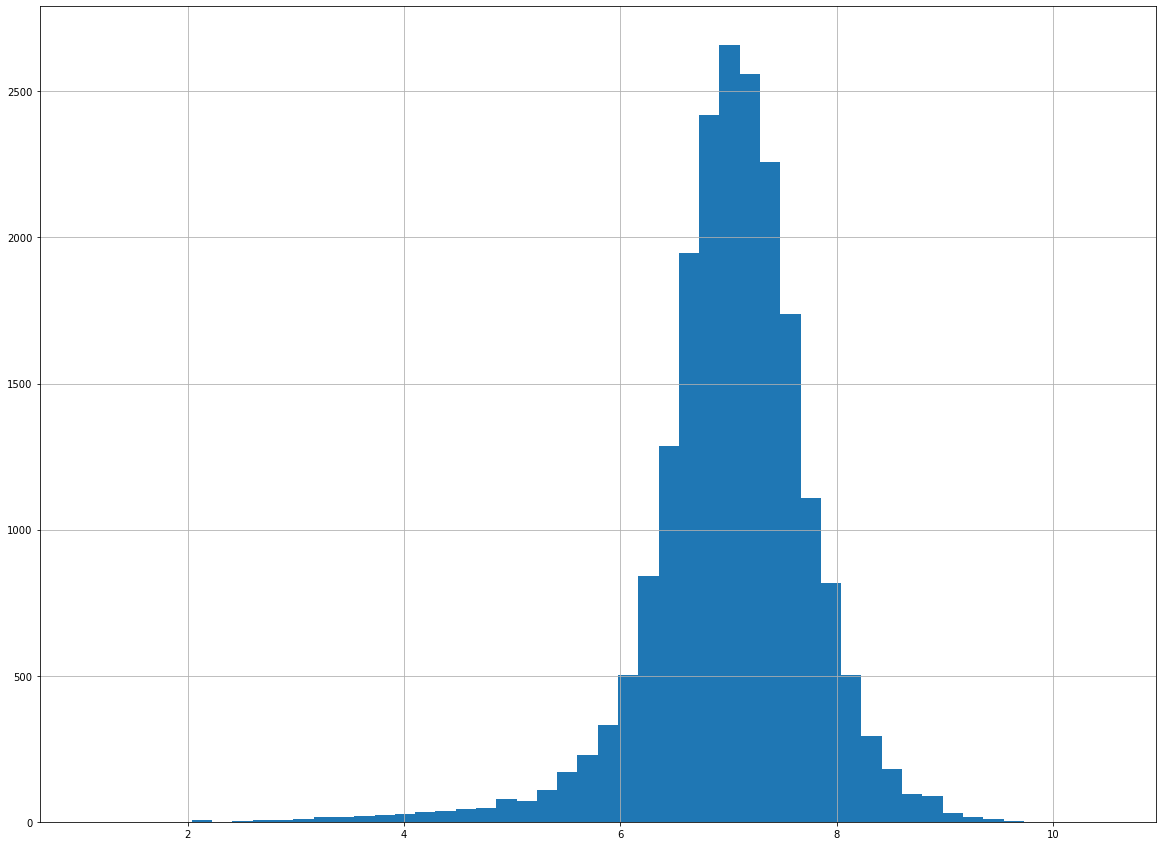

In [9]:
np.log(housing['population']).hist(bins=50,figsize=(20,15))

데이터 쪼개기
- 랜덤으로 쪼개기
- 기준을 두고 자르기
- 보통 훈련세트와 테스트세트의 비율을 8 : 2 ,7.5:2.5 정도로 나누는 것이 일반적
- 테스트 세트를 생성할 때는 반드시 데이터를 한번 섞고(shuffle) 잘라야(split)한다.

numpy 100제 풀어보기

In [10]:
# 사이킷 런에 기능이 좋은 데이터 스플리터가 있지만 그냥 한번 직접 만들어 보자
# 1. 랜덤으로 쪼개기

def split_train_test(data,test_ratio):
    shuffled_indices = np.random.permutation(len(data)) 
    # permutation 데이터 개수 만큼 무작위 인덱스를 가진 리스트를 생성
    test_set_size = int(len(data)*test_ratio)
    # 지정한 비율만큼 테스트 세트의 크기 구하기
    test_indices = shuffled_indices[: test_set_size]
    # 원본데이터에서 test_set_size 만큼 잘라냄
    train_indices = shuffled_indices[test_set_size : ]
    # 나머지 데이터는 훈련 세트로 사용
    return data.iloc[test_indices], data.iloc[train_indices]
    # 데이터 프레임 리턴

In [11]:
df_test, df_train = split_train_test(housing,0.2)

len(df_train),len(df_test)

(16512, 4128)

랜덤으로 셔플링하고 자르면 단점이 있다
- 랜덤으로 셔플링을 무한히 하게 되면 모델은 언젠가는 모든 데이터를 봐버린다.
- 보완하기 위한 방법으로 랜덤 시드를 고정하는 방법이 있다. np.random.seed(42)
    - 장점 : 언제나 똑같은 랜덤값을 활용하기 대문에 동일한 데이터에 대해 안정적인 셔플링 가능
    - 단점 : 데이터가 추가되거나 삭제되면 시드가 소용이 없다.
    
    
랜덤의 단점을 해결하기 위한 방법
- 해시값 또는 고유값을 활용해서 잘라내는 방법
    - 셔플링이 아닌,훈련,테스트 데이터를 일정하게 관리할 수 있게 해준다.
    - 각 데이터 마다 고유값이 존재하는 경우 사용하면 좋다( 단 인덱스는 금지)

In [12]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
  return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
  ids = data[id_column]
  in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
  return data.loc[~in_test_set], data.loc[in_test_set]

대표적인 머신러닝 라이브러리인 사이킷런 활용하기

사이킷런은 train_test_split 함수를지원

In [13]:
# 사이킷런을 활용한 랜덤 셔플, 스플릿

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
housing, test_size=0.2, random_state=42)

계층적 분할 수행하기
- 'median_income' 데이터는 'median_house_value' 예측에 지대한 영향을 미치는 데이터이다.
- 이 데이터를 랜덤으로 집어 넣어서 의미 없게 사용하기 보다는 **계층을 분할**해서 train,test 데이터에 일정하게 골고루 들어가게 해주는 것이 좋다.

In [14]:
housing['income_cat'] = pd.cut(housing['median_income'], 
                               bins=[0.0,1.5,3.0,4.5,6.0,np.inf],
                               labels=[1,2,3,4,5])

In [15]:
housing['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

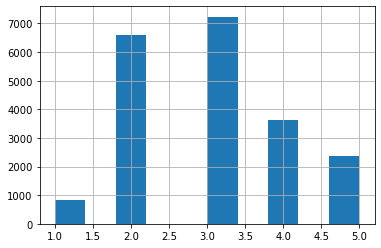

In [16]:
housing['income_cat'].hist()

사이킷런 에서 섞고, 구간 비율을 유지하면서 잘라내는 방법 : 'StratifiedShuffleSplit활용

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

In [18]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [19]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [20]:
# 테스트 세트에서의 median_income 비율 확인
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [21]:
strat_train_set1,strat_test_set1 = train_test_split(housing,
                                                    test_size=0.2,
                                                    random_state=42,
                                                   stratify=housing['income_cat'])

In [22]:
strat_test_set1['income_cat'].value_counts() / len(strat_test_set1)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [23]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "전체": income_cat_proportions(housing),
    "계층 샘플링": income_cat_proportions(strat_test_set),
    "무작위 샘플링": income_cat_proportions(test_set),
}).sort_index()
compare_props["무작위 샘플링 오류율"] = 100 * compare_props["무작위 샘플링"] / compare_props["전체"] - 100
compare_props["계층 샘플링 오류율"] = 100 * compare_props["계층 샘플링"] / compare_props["전체"] - 100
compare_props

,전체,계층 샘플링,무작위 샘플링,무작위 샘플링 오류율,계층 샘플링 오류율
1,0.039826,0.039729,0.040213,0.973236,-0.243309
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114583,0.109496,-4.318374,0.127011


In [24]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop('income_cat',axis=1,inplace=True)

시각화 진행하기

In [25]:
housing = strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


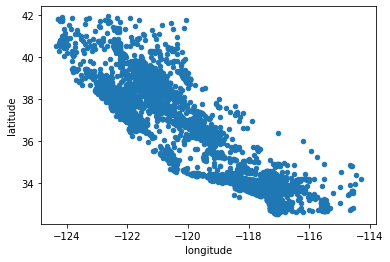

In [26]:
housing.plot(kind='scatter',x='longitude',y='latitude')

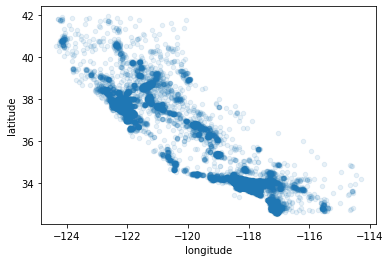

In [27]:
# alpha를 사용해서 밀집도 확인
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

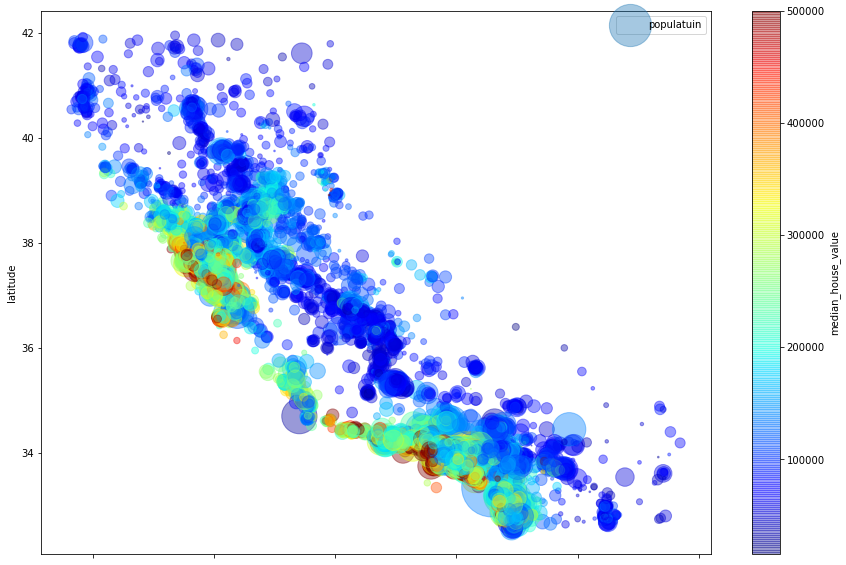

In [28]:
# 원의 크기 : 인구수를 의미 - 인구수가 많으면 점이 커짐
# colorbar를 이용해서 가격이 높아질 수록 붉은색으로

housing.plot(kind='scatter',
            x='longitude',
            y='latitude',
            alpha=0.4,
            s=housing['population']/10, # 점의 크기
            label='populatuin',# 레이블링
            c='median_house_value',# 컬러맵 기준
            cmap=plt.get_cmap('jet'),# 컬러맵 테마
            colorbar=True,#컬러바 표시여부
            figsize=(15,10))
plt.legend()
plt.show()

In [29]:
images_path = os.path.join(".", "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x26421c00ca0>)

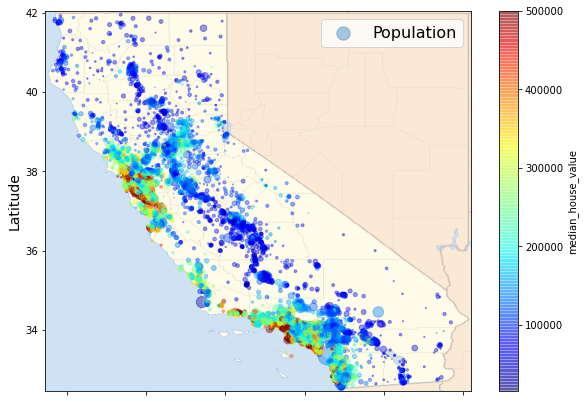

In [30]:
import matplotlib.image as mpimg
california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=True, alpha=0.4,
                  
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.legend(fontsize=16)
plt.show()

지도 시각화는 folium을 제일 많이 사용합니다. 한국 지도는 geoJSON 데이터셋이 필요하다.

상관관계 알아보기
- 머신러닝에서 사용되는 모든 데이터는 실수값을 활용합니다
- 정수값도 사용되나, 정수값은 보통 카테고리 선정에 활용 된다



상관관계는 단순히 두 변인간의 관련성을 의미할 뿐, 원인과 결과의 방향성은 말하지 못한다.
예를 들어 키가 큰 아이 일수록 어휘력이 좋다는 것은 상관관계이지 키가 크기 때문에 어휘력이

좋은 것은 아니다.

 

반면 두 변인 중 하나가 다른 변인이 변화하는 것의 '원인'이 될 때 이를 인과관계라 한다.

이 경우 A가 B의 값이 변하는 원인이 된다면 A를 독립변인, B를 종속변인이라고 지칭합니다.

In [31]:
# median_house_value에 대한 다른 특성들의 상관관계 확인하기
# 모든 특성간의 상관 계수 파악 - Stand correlation Coefficient ( 표준 상관 관계)

corr_matrix = housing.corr()

corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [32]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [33]:
housing.loc[:,housing.columns!='ocean_proximity']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0


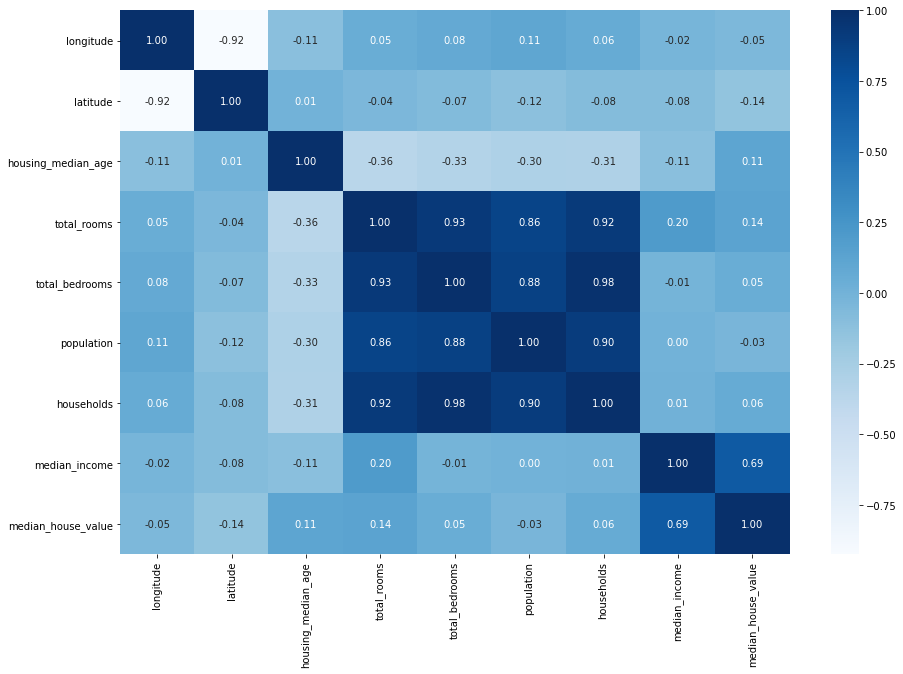

In [34]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,annot=True,cmap='Blues',fmt = '.2f')

In [35]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

피어슨 상관계수 (r)
- 상관 계수의 절댓값이 0~0.3이면 약한 상관 계수
- 상관 계수의 절댓값이 0.3~0.7이면 보통 상관 계수
- 상관 계수의 절댓값이 0.7~1이면 강한 상관 계수

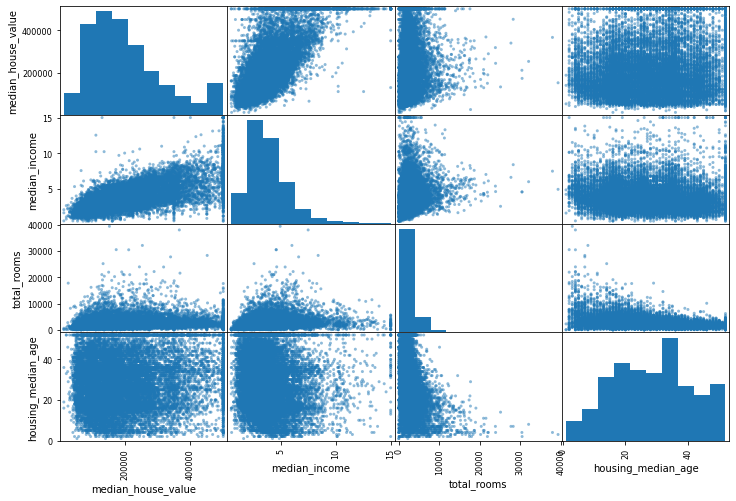

In [36]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value','median_income','total_rooms','housing_median_age']

scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

In [37]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [38]:
# 가구 당 방 개수
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
# 방당 침실 수
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
# 가구당 인구수
housing['population_per_household'] = housing['population']/housing['households']

In [39]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

특성들은 보통 특성들의 곱으로 서로의 관계를 더 정의할 수 있다

머신러닝을 위한 데이터 준비


자동화 = 클래스나 함수를 만드는 것

자동화 하는 이유
- 어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있습니다.

머신러닝 모델에 훈련하기 위해서는 피쳐와 타겟을 분리해야 합니다.

In [40]:
target_label =  'median_house_value'

housing = strat_train_set.drop(columns = 'median_house_value')
housing_target = strat_train_set['median_house_value'].copy()

In [41]:
housing_target

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

머신러닝 모델은 NaN(Not a Number) 값을 받지 못한다. -> NaN에 대한 처리가 필요하다

In [42]:
# 사이킷런의 simpleimputer 사용하기

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') # 중간값으로 채우는 imputer

In [43]:
# 수치 데이터만 가지고 있는 데이터프레임 만들기
housing_num = housing.drop('ocean_proximity',axis=1)
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [44]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

사이킷런에는 추정기(estimator) / 변환기(transfomer)
 - 공통점 : 데이터를 적용시키는 작업 -fit
 - 차이점 : 추정기 -> 예측, 변환기 -> 변환

In [45]:
# imputer로 중간값 확인하기
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [46]:
# dataframe 에서 중간값 확인하기

housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

In [47]:
# 누락값이 전부 중간값으로 채워진 numpy 배열로 변환(transform)

x = imputer.transform(housing_num)

In [48]:
# 누락값이 채워진 numpy 배열 x를 토대로 데이터프레임을 다시 만든다.

housing_tr = pd.DataFrame(x,columns=housing_num.columns,index=housing_num.index)

In [49]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


텍스트 범주형(categorical) 다루기

In [50]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [51]:
# Encoder : 100% transformer
# 인코딩 : 어떤 데이터를 내가 원하는 형식으로 바꾸는 것

In [52]:
# 원하는 범주형 데이터에 대해 0,1,2,,, 순서대로 숫자를 부여
from sklearn.preprocessing import OrdinalEncoder 

In [53]:
ordinal_encoder = OrdinalEncoder()

In [54]:
# fit : 데이터 적용
# transform : fit에 의해서 적용된 데이터를 토대로 데이터를 변환
# fit_transform : 적용된 데이터를 기준으로 데이터를 바로 변환

housing_cat_encoded = ordinal_encoder.fit_transform(housing[['ocean_proximity']])

In [55]:
housing_cat_encoded

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [56]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

오디널 인코딩은 간단하게 문자열 값을 숫자형 카테고리 값으로 변환한다.
하지만 단점이 있다
이런 범주형 자료의 숫자 변환 값은 단순 코드이지 숫자 값에 따른 순서나 중요도로 인식돼서는 안된다. 이러한 특성 떄문에 오디널 인코딩은 선형회귀와 같은 ml알고리즘에서는 적용 하면 안된다.

원 핫 인코딩은 레이블 인코딩의 이러한 문제점을 해결하기 위한 인코딩방식입니다.

In [57]:
# 사이킷런에서의 원 핫 인코딩

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
ohencoder = OneHotEncoder()

In [60]:
housing_cat_onehot= ohencoder.fit_transform(housing[['ocean_proximity']])
housing_cat_onehot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [61]:
# 원핫인코딩을 하면 합쳐져서 나옴 압축을 풀어줘야 함
housing_cat_onehot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

커스텀 변환기 만들기 ( 사이킷런의 클래스를 상속 )

파이썬은 덕 타이핑을 지원함 (문법)

In [62]:
class A:
  def foo(self):
    print('A foo')
class B:
  def foo(self):
    print('B foo')
class C:
  def foo(self):
    print('C foo')
# 클래스의 속성이나 메소드가 객체의 유형을 결정 지어주는 것
def goo(obj):
  obj.foo()
a = A()
b = B()
c = C()
goo(a)
goo(b)
goo(c)

A foo
B foo
C foo


In [63]:
# 사이킷런을 활용해 사용자 정의 변환기 만들기
# BaseEstimator : 추정기 상속 (파이프라인에 포함시키기 위해서 필요하다)
# TransformerMixin : fit_transfrom 메소드를 자동으로 구현

from sklearn.base import BaseEstimator, TransformerMixin

# 데이터를 사용자 정의대로 변환시킬 컬럼의 인덱스를 정의
# 특성 상호작용 변환기
rooms_ix, bedrooms_ix, population_ix, households_ix = 3 ,4 ,5 ,6

In [64]:
# 특성의 상호작용을 추가해주는 변환기를 만들 것이다.
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    # 생성자에서 하는일 : 총 방 개수당 침실을 추가 할지 말지에 대한 여부를 결정.
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X):
        return self
    
    def transform(self, X):
        # 가구당 방의 비율
        rooms_per_household = X[:,rooms_ix] / X[:,households_ix]
        population_per_household = X[:, population_ix] / X[:,households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # np.c_ : concat numpy 배열들을 가로방향으로 합쳐준다.
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [65]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [66]:
housing.shape, housing_extra_attribs.shape

((16512, 9), (16512, 11))

변환 파이프라인 만들기
- 데이터 변환하는 과정은 반드시 순서가 지켜져야만 한다.
- 데이터 변환에 대한 표준화가 되어있지 않으면 순서가 헷갈리게 되고, 데이터 처리가 제대로 안됩니다.

1. 누락값 채우기 ( SimpleImputer )
2. 추가특성 생성하기
3. 스케일 조정하기 ( 이상치가 많기 때문에 StandardScaler 사용 )

원핫인코딩은 나중에 지금은 숫자에 관련된 특성만 고려할 것이기 때문

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [68]:
# 파이프라인 썻을때

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_attr',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

In [69]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [70]:
pd.DataFrame(housing_num_tr)

,0,1,2,3,4,5,6,7,8,9,10
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928
...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755,-0.428853
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689,0.491503
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554,-0.521776
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509,-0.303407


In [71]:
# 파이프라인 안썼을 때
# imputer = SimpleImputer(strategy=‘median’)
# imputer.fit(housing_num)
# housing_num_impute = imputer.transform(housing_num)
# attr_adder = CombinedAttributesAdder()
# housing_num_attr_added = attr_adder.fit_transform(housing_num_impute)
# scaler = StandardScaler()
# housing_num_std_scaled = scaler.fit_transform(housing_num_attr_added)
# housing_num_std_scaled[:5]

기존에 있던 파이프라인과 더불어, 새로운 변환기를 더 추가해 줄 수 있는 기법

In [72]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # 수치형 컬럼 이름 알아내기
cat_attribs = ['ocean_proximity'] # 원핫인코딩할 컬럼 이름

full_pipepline = ColumnTransformer([
    ('num',num_pipeline,num_attribs), # 데이터 프레임중 num_attribs에 들어있는특성듦나 num_pipeline을 태운다
    ('cat',OneHotEncoder(),cat_attribs) # 데이터 프레임중 cat_attribs에 들어있는 특성들만 원핫인코딩을 태운다.
])

housing_prepared = full_pipepline.fit_transform(housing)

In [73]:
pd.DataFrame(housing_prepared)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.156043,0.771950,0.743331,-0.493234,-0.445438,-0.636211,-0.420698,-0.614937,-0.312055,-0.086499,0.155318,1.0,0.0,0.0,0.0,0.0
1,-1.176025,0.659695,-1.165317,-0.908967,-1.036928,-0.998331,-1.022227,1.336459,0.217683,-0.033534,-0.836289,1.0,0.0,0.0,0.0,0.0
2,1.186849,-1.342183,0.186642,-0.313660,-0.153345,-0.433639,-0.093318,-0.532046,-0.465315,-0.092405,0.422200,0.0,0.0,0.0,0.0,1.0
3,-0.017068,0.313576,-0.290520,-0.362762,-0.396756,0.036041,-0.383436,-1.045566,-0.079661,0.089736,-0.196453,0.0,1.0,0.0,0.0,0.0
4,0.492474,-0.659299,-0.926736,1.856193,2.412211,2.724154,2.570975,-0.441437,-0.357834,-0.004194,0.269928,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.722267,-0.673331,1.379547,-0.632123,-0.725361,-0.759010,-0.764049,0.554158,0.234352,-0.031755,-0.428853,0.0,1.0,0.0,0.0,0.0
16508,1.007011,-0.823004,0.902385,-0.667196,-0.584183,-0.329664,-0.636291,-0.948815,-0.308114,0.084689,0.491503,0.0,1.0,0.0,0.0,0.0
16509,1.586489,-0.724781,-1.562952,1.043901,0.822735,0.607904,0.713156,-0.316705,0.346934,-0.030554,-0.521776,0.0,1.0,0.0,0.0,0.0
16510,0.782213,-0.851068,0.186642,-0.309919,-0.374849,-0.057178,-0.375451,0.098121,0.024995,0.061509,-0.303407,1.0,0.0,0.0,0.0,0.0


머신러닝 모델 선택과 훈련하기

In [74]:
from sklearn.linear_model import LinearRegression

In [75]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_target)

LinearRegression()

In [76]:
example_train_data = housing.iloc[:5]
example_labels = housing_target.iloc[:5]
example_data_prepared = full_pipepline.transform(example_train_data)

In [77]:
print("예측 : {}".format(lin_reg.predict(example_data_prepared))) # 변환한 데이터로 예측
print("레이블 : {}".format(list(example_labels)))

예측 : [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
레이블 : [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


전체 데이터에 대한 오차(RMSE) 확인하기

In [78]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

# MSE구하기

lin_mse = mean_squared_error(housing_target,housing_predictions)
print('MSE : {}'.format(lin_mse))

# RMSE구하기
lin_rmse = np.sqrt(lin_mse)
print('RMSE : {}'.format(lin_rmse))

MSE : 4709829587.97112
RMSE : 68628.19819848922


선형회귀 모델은 캘리포니아 주택 가격 데이터세트에 대해 굉장히 과소적합된 상태이다.


따라서 선형회귀보다 더 복잡한 모델을 선정하거나,데이터 셋의 피처를 더 늘려야한다.

In [79]:
# 선형 회귀 모델보다 훨씬 복잡한 의사결정나무 모델 사용
from sklearn.tree import DecisionTreeRegressor

In [80]:
tree_reg = DecisionTreeRegressor()

In [81]:
tree_reg.fit(housing_prepared,housing_target)

DecisionTreeRegressor()

In [83]:
y_predict = tree_reg.predict(example_data_prepared)

In [88]:
print('정답값 : {}'.format(list(housing_target[:5])))
print('예측값 : {}'.format(y_predict))

정답값 : [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]
예측값 : [286600. 340600. 196900.  46300. 254500.]


In [90]:
# mse
mean_squared_error(housing_target[:5],y_predict)

0.0

의사결정나무로 예측한 결과 훈련데이터에 대한 오차가 하나도 없다라는 것을 알 수 있다 -> 의사결정나무는 과적합이 일어남

In [94]:
# 교차검증 수행하기 - 훈련세트를 훈련 /검증 세트로 다시 한번 나눠서 여러번 검증

from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, # 모델
                        housing_prepared, # 훈련 데이터
                        housing_target, # 훈련 레이블
                        scoring='neg_mean_squared_error', # 평가 방식
                        cv=10) # 교차 검증 횟수 - 폴드의 갯수

tree_rmse_scores = np.sqrt(-scores)
print(tree_rmse_scores)

[69400.07458106 67216.07072153 71511.31289603 69703.86579581
 69360.29014925 75597.0767763  70823.76664671 70021.10068694
 76591.77387449 70126.56476118]


In [95]:
# 스코어를 정확하게 표현하기 위한 함수
def display_scores(scores):
    print('점수 :' ,scores)
    print('평균 :' ,scores.mean())
    print('표준편차 :' ,scores.std())
    
# tree_rmse_scores 결과 보기
display_scores(tree_rmse_scores)

점수 : [69400.07458106 67216.07072153 71511.31289603 69703.86579581
 69360.29014925 75597.0767763  70823.76664671 70021.10068694
 76591.77387449 70126.56476118]
평균 : 71035.18968893072
표준편차 : 2750.43257076213


In [96]:
# 선형 모델에 대한 cross_val_scores

lr_score = cross_val_score(lin_reg,
                           housing_prepared,
                           housing_target,
                           scoring='neg_mean_squared_error',
                           cv=10
                          )
lr_rmse_scores = np.sqrt(-lr_score)

In [97]:
display_scores(lr_rmse_scores)

점수 : [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균 : 69052.46136345083
표준편차 : 2731.674001798347


앙상블 모델인 RandomForest를 사용해보자

In [99]:
from sklearn.ensemble import RandomForestRegressor

In [100]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_target)

RandomForestRegressor()

In [102]:
forest_predict = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_target,forest_predict)
forest_rmse = np.sqrt(forest_mse)

print('교차검증을 하지 않은 랜덤 포레스트의 점수 : {}'.format(forest_rmse))

교차검증을 하지 않은 랜덤 포레스트의 점수 : 18672.43732466541


In [103]:
# 랜덤포레스트에 대한 교차검증 수행
forest_mse_scores = cross_val_score(RandomForestRegressor(),
                                   housing_prepared,
                                   housing_target,
                                   scoring='neg_mean_squared_error',
                                   cv=10)

forest_rmse_scores = np.sqrt(-forest_mse_scores)
display_scores(forest_rmse_scores)

점수 : [49599.87811766 47462.56706146 49737.92733292 52291.35056439
 49343.21690873 53274.32433399 48423.43471407 48379.94799138
 52900.03327732 50271.44393698]
평균 : 50168.412423889225
표준편차 : 1907.3691512114044


하이퍼 파라미터 조절
- 하이퍼 파라미터란? 개발자가 직접 넣어주는 파라미터 (머신이 학습할 수 없는 매개변수)


모든 머신러닝 모델은 하이퍼 파라미터가 필요하다. 개발자는 사용할 하이퍼 파라미터 후보를 선정해 놓고 모델 훈련 시에 각각의 하이퍼 파라미터를 넣어가면서 최적의 파라미터를 찾아낼 수 있어야 한다.

이 과정을 GridSeach 라고 한다.

In [105]:
# 사이킷런의 GridSearchCV -> GridSearch + Cross Validation을 동시에 지원
from sklearn.model_selection import GridSearchCV

# 리스트를 만들고, 리스트에 딕셔너리를 만들어서 사용할 하이퍼 파라미터를 선정해 놓는다.
params_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]



In [107]:
grid_search = GridSearchCV(forest_reg,
                          params_grid,
                          cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared,housing_target)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [108]:
# 최적의 파라미터 확인하기
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [109]:
# 최적의 결과를 내었던 모델 가져오기
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [110]:
grid_search.cv_results_

{'mean_fit_time': array([0.09246078, 0.27143168, 0.85087562, 0.13532939, 0.44008288,
        1.22024932, 0.16600718, 0.52688541, 1.56603622, 0.19938049,
        0.65350986, 2.0002161 , 0.11903048, 0.38887324, 0.15110745,
        0.49550753, 0.17629371, 0.61033993]),
 'std_fit_time': array([0.01302292, 0.02182711, 0.06557432, 0.01731169, 0.06699814,
        0.04091632, 0.00563387, 0.01272476, 0.02307142, 0.00593367,
        0.01641325, 0.03338565, 0.00700017, 0.01116847, 0.00938264,
        0.01525025, 0.0040298 , 0.01204347]),
 'mean_score_time': array([0.0057981 , 0.01159391, 0.0353796 , 0.00519686, 0.01279449,
        0.03277993, 0.00599794, 0.01159363, 0.0317843 , 0.00479794,
        0.01099486, 0.03483057, 0.00479908, 0.01279354, 0.00519881,
        0.0125936 , 0.00499902, 0.01279459]),
 'std_score_time': array([2.63731777e-03, 8.00061459e-04, 3.07108116e-03, 1.59874042e-03,
        1.83260628e-03, 4.01020248e-04, 1.99768584e-03, 1.74219180e-03,
        1.59758624e-03, 4.00068535e-

In [112]:
res = grid_search.cv_results_

for mean_test_score,mean_train_score ,params in zip(res['mean_test_score'],res['mean_train_score'],res['params']):
    print('평균검증세트에 대한 점수 : {}'.format(np.sqrt(-mean_test_score)))
    print('평균훈련세트에 대한 점수 : {}'.format(np.sqrt(-mean_train_score)))
    print('하이퍼 파라미터 : {}'.format(params))
    print('-'*50)

평균검증세트에 대한 점수 : 64424.10050730026
평균훈련세트에 대한 점수 : 33159.645135919585
하이퍼 파라미터 : {'max_features': 2, 'n_estimators': 3}
--------------------------------------------------
평균검증세트에 대한 점수 : 55532.05603558541
평균훈련세트에 대한 점수 : 24134.080417061385
하이퍼 파라미터 : {'max_features': 2, 'n_estimators': 10}
--------------------------------------------------
평균검증세트에 대한 점수 : 52674.89865556089
평균훈련세트에 대한 점수 : 20759.819500526042
하이퍼 파라미터 : {'max_features': 2, 'n_estimators': 30}
--------------------------------------------------
평균검증세트에 대한 점수 : 60250.80923195694
평균훈련세트에 대한 점수 : 31378.73428373437
하이퍼 파라미터 : {'max_features': 4, 'n_estimators': 3}
--------------------------------------------------
평균검증세트에 대한 점수 : 52762.09316082234
평균훈련세트에 대한 점수 : 23063.24421909836
하이퍼 파라미터 : {'max_features': 4, 'n_estimators': 10}
--------------------------------------------------
평균검증세트에 대한 점수 : 50769.09462031118
평균훈련세트에 대한 점수 : 19752.523051813743
하이퍼 파라미터 : {'max_features': 4, 'n_estimators': 30}
-----------------------------

그리드 서치를 활용해 최적의 모델을 찾아냈으면 ... 런칭!

In [114]:
final_model = grid_search.best_estimator_

In [117]:
x_test = strat_test_set.drop('median_house_value',axis=1)
y_test = strat_test_set['median_house_value'].copy()

x_test_prepared = full_pipepline.transform(x_test)

In [118]:
final_predict = final_model.predict(x_test_prepared)

In [120]:
final_mse = mean_squared_error(y_test,final_predict)
final_rmse = np.sqrt(final_mse)

print('최종 결과 : {}'.format(final_rmse))

최종 결과 : 47928.29183163578


In [124]:
# scipy를 이용해서 신뢰구간 만들기
from scipy import stats
confidence = 0.95 # 신뢰 구간 만들기
squared_erros = (final_predict - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc=squared_erros.mean(),
                         scale=stats.sem(squared_errors)))


array([45928.95386162, 49847.5025751 ])